In [40]:
# Manipulação dos dados e visualizações
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap
from matplotlib.colors import Normalize, LogNorm
from matplotlib.colorbar import ColorbarBase
from matplotlib.gridspec import GridSpec
import random

# Widgets para iteração com os gráficos
from ipywidgets import interact, FloatRangeSlider
import ipywidgets as widgets

# Extração de sinais de audio
from scipy.io import wavfile
from scipy.fft import fft, fftfreq
from scipy.signal import spectrogram
import librosa
import librosa.display
import IPython.display as ipd

```python
#  Choose a colormap
colormap = get_cmap('GnBu')
num_colors = len(top_frequencies)
color_indices = np.linspace(0, 1, num_colors)

# norm = LogNorm(vmin=1, vmax=num_colors)
norm = Normalize(vmin=0, vmax=num_colors
color = colormap(color_indices[i])

#  Create a color bar
sm = plt.cm.ScalarMappable(cmap=colormap, norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax1)
cbar.set_label('Frequencies')

# Define custom tick positions and labels
tick_positions = np.arange(0, len(top_frequencies))
tick_labels = [f'{np.round(i,1)}' for i in np.sort(top_frequencies)]
# tick_positions = np.logspace(0, np.log10(top_frequencies), len(top_frequencies))
# tick_labels = [f'{int(pos)}' for pos in tick_positions]
cbar.set_ticks(tick_positions)
cbar.set_ticklabels(tick_labels)
                 
                 
# Remove ticks
 ax.spines['top'].set_visible(False)
 ax.spines['right'].set_visible(False)
 ax.spines['bottom'].set_visible(False)
 ax.spines['left'].set_visible(False)
```

### 1. Captura do sinal pelo microfone

* O microfone contém um componente chamado diafragma que converte as ondas sonoras em variações de pressão em um sinal elétrico.

* Essas variações de pressão são transformadas em variações de corrente elétrica ou tensão elétrica, dependendo do tipo de microfone.

* O sinal elétrico resultante é uma representação analógica da forma de onda do som.

> figura da onda sonora produzindo a oscilação no diafragma e produzindo uma variação no fluxo magnético.

### 2. Pré-ampliação do sinal

* O sinal elétrico captado pelo microfone pode ser muito fraco para ser processado diretamente, então é comum que seja amplificado.

* Amplificadores de sinal são usados para aumentar a amplitude do sinal elétrico sem distorcê-lo significativamente.
* A amplificação ajuda a melhorar a relação sinal-ruído e a garantir que o sinal analógico seja forte o suficiente para ser processado com precisão pelo ADC.

### 3. Amostragem:

* A amostragem é o processo de capturar instantâneos discretos do sinal analógico em intervalos regulares de tempo.
* O teorema de Nyquist-Shannon estabelece que a taxa de amostragem deve ser pelo menos duas vezes maior que a frequência máxima do sinal analógico para evitar a perda de informações.
* Um circuito de amostragem e retenção é usado para manter o valor do sinal analógico constante enquanto é amostrado pelo ADC.

### 4. Quantização:

* A quantização é o processo de mapear a amplitude de cada amostra do sinal analógico em um valor digital correspondente.
* O ADC divide a faixa de valores possíveis em um conjunto finito de níveis discretos.
* Quanto maior a resolução do ADC (medida em bits), mais precisamente o sinal analógico é representado digitalmente.
* A quantização introduz um erro chamado erro de quantização, que é a diferença entre o valor digitalizado e o valor real do sinal analógico.

### 5. Codificação:

* Após a quantização, os valores digitais resultantes são codificados em formato digital, geralmente usando código binário.
* Cada amostra quantizada é representada por uma sequência de bits, onde cada bit representa um nível de amplitude.
* O formato dos dados digitais pode variar dependendo do tipo de ADC e do protocolo de comunicação usado para transmitir os dados.

### 6. Saída digital:

* A saída digital do ADC é uma sequência de valores digitais que representam o sinal analógico original ao longo do tempo.
* Esses valores digitais podem ser processados por dispositivos digitais, como processadores de sinal digital (DSP), microcontroladores ou computadores.
* A saída digital pode ser armazenada em memória digital, transmitida por meio de interfaces digitais (como USB ou Ethernet) ou processada em tempo real para várias aplicações.

### 1. Lendo arquivos de audio
Vamos ler um arquivo `.wav` contendo a gravação de uma voz pronunciando a letra <b>a</b>

<center>
<img src='.\Images\record.png' width=500>
</center>

> O sinal original é uma onda cujo eixo vertical representa a variação na pressão acústica em função do tempo.

<center>
<img src='.\Images\signal_reconstruction.png'>
</center>

> Já o sinal processado (discretizado) pelo computador é uma reconstrução do sinal original (analógico) a partir de $n$ amostras coletadas em intervalos de tempo fixos $\Delta t$. Evidentemente, quanto maior o número de amostras coletadas por unidade de tempo, mais fidedigna será a representação do sinal reconstruido.

In [23]:
# Lê .wav de canal único e retorna vetor com as amplitudes e a taxa de amostragem
x, sr = librosa.load('grave.wav')

* `x` representa um vetor unidimensional com as intensidades (amplitudes) do sinal digitalizado em cada instante de tempo.
* `sr` é a taxa de amostragem (sample rate) sobre a qual o sinal analógico original fora submetido a fim de obter sua versão digitalizada. 

> Note que `sr` é expressa em amostras/s, sendo assim, para obter a <b>duração</b> ($\Delta t$) do sinal original, basta dividir o número total de amostras (obtido pelo tamanho do vetor `x`) pela taxa de amostragem `sr`
$$
\Delta t = \frac{\text{número de amostras}}{\frac{\text{número de amostras}}{\text{segundo}}}
$$

In [24]:
# Calcula a duração do audio em segundos
duracao = x.size/sr

> Caso o sinal fosse estereo, considerariamos a média de cada um dos canais.
```python
# Ensure the signal is mono
if signal.ndim > 1:
    signal = signal.mean(axis=1)           # Retorna a média
```

In [25]:
# Vetor correspondente aos instantes de tempo
tempo = np.linspace(0, duracao, x.size)

## 2. Visualizando a forma de onda

### 2.1 Sinal no tempo

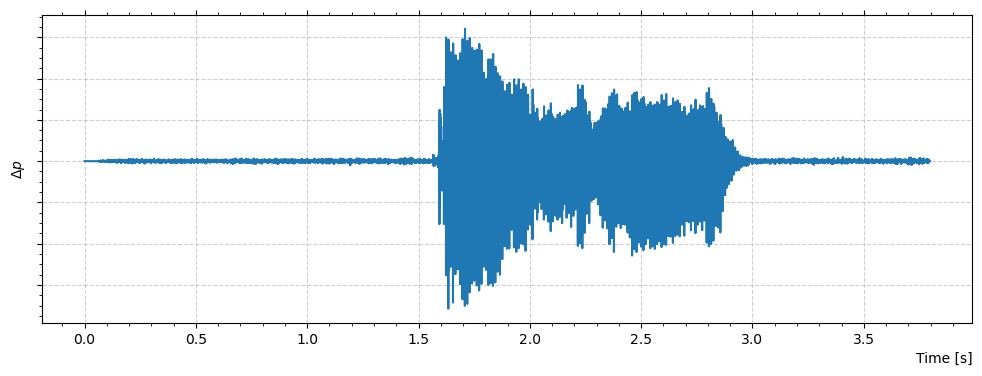

In [31]:
fig, ax = plt.subplots(figsize=(12, 4))

ax.plot(tempo, x,color='tab:blue')
ax.set_xlabel('Time [s]', loc='right')
ax.set_ylabel('$\Delta p$')
ax.set_yticklabels([])
ax.grid(True, alpha=0.6,ls='--')
ax.minorticks_on()
plt.tick_params(axis='x', top=True, which='both')

plt.show()

Como amostrar o sinal

In [10]:
# Amostrando o sinal original
n = 50

# Calculate the step size
k = len(tempo) // n

# Sample the arrays using slicing
t_sampled = tempo[::k]
x_sampled = x[::k]

### 2.2 Sinal na frequência
Por se tratar de um sinal não periódico, usaremos a transformada de Fourier para extrair as componentes de frequência.

* Contínua (FFT)
$$
\mathcal{F}\{f(t)\} = \hat{f}(\omega) = \int_{-\infty}^{\infty} f(t) e^{-i \omega t} \, dt
$$

* Discreta (DFT)
$$
X[k] = \mathcal{F}\{x[n]\} = \sum_{n=0}^{N-1} x[n] e^{-i \frac{2\pi}{N} kn}
$$

> Repare que embora o som seja uma onda contínua, o sinal a ser processado está armazenado num vetor com finitos elementos, sendo, portanto, uma representação discreta do mesmo

In [32]:
# Realiza a DFT no sinal x
fourier_transform = fft(x)

In [91]:
ft = random.sample(list(fourier_transform),5)

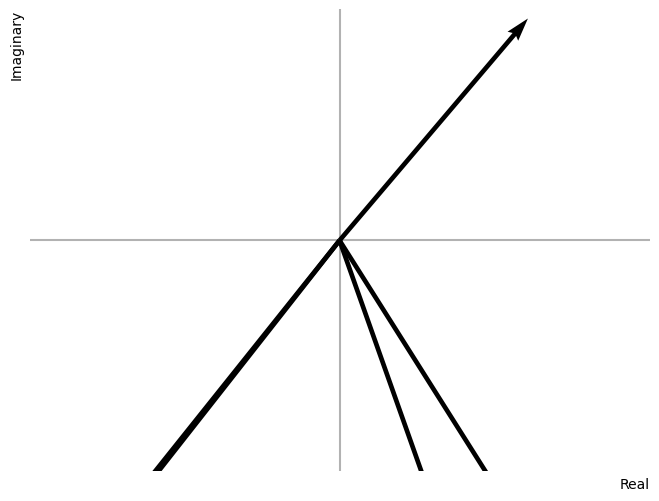

In [93]:
# Plot the complex numbers in the Argand-Gauss plane
plt.figure(figsize=(8, 6))

ax = plt.subplot()
for cn in ft:
#     ax.plot([0, cn.real], [0, cn.imag],color='tab:blue')
    ax.quiver(0,0, cn.real, cn.imag, angles='xy', scale_units='xy', scale=21)
    
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

ax.set_xlabel('Real',loc='right')
ax.set_ylabel('Imaginary',loc='top')
ax.set_xticks([],[])
ax.set_yticks([],[])

plt.axhline(y=0, color='k',alpha=0.3)
plt.axvline(x=0, color='k',alpha=0.3)
# plt.grid(True, alpha=0.4, which='both')
plt.axis('equal')
plt.show()

O vetor com as frequências é simétrico. Nesse sentido, estamos interessados somente nas frequências positivas

In [ ]:
# Calcula as frequências correspondnetes a cada índice do vetor da DFT
frequencies = fftfreq(x.size, 1/sr)[:x.size//2]

In [ ]:
# Magnitudes of the Fourier coefficients
magnitudes = 2.0/(x.size) * np.abs(fourier_transform[:x.size//2])

* <b>Analyze the Frequency Spectrum</b>: Examine the resulting frequency spectrum to identify the dominant frequency components.

```python
gridspec_kw={'height_ratios': [2, 3]}
```

In [ ]:
# Maior frequência
a_high = max(magnitudes)
f_high = frequencies[np.where(magnitudes == a_high)[0][0]]

In [ ]:
fig, (ax1,ax2) = plt.subplots(2,1,figsize=(12, 6),layout='constrained',sharey=True)

ax1.plot(frequencies, magnitudes, color='tab:blue')
ax1.grid(True, alpha=0.4,ls='--')
ax1.set_xlim(0,)

ax2.plot(frequencies, magnitudes, color='tab:blue',alpha=0.3)
ax2.vlines(x=f_high,ymin=0,ymax=a_high,color='tab:red',ls='--',lw=2)
ax2.set_xlabel('Frequencies (Hz)',loc='right')
ax2.set_ylim(0, )
ax2.set_xlim(0, 2000)
ax2.grid(True, alpha=0.4,ls='--')
ax2.text(f_high,-0.002,'$f_{MAX}$',color='tab:red')

plt.show()

> Como esperado, a frequência de maior intensidade é aproximadamente igual a 98Hz

> Da figura acima, é possivel notar que as frequências de maiores intensidades estão abaixo de 1.5kHz

### Identificando as maiores componentes de frequência

In [ ]:
# Identify the top n frequencies
top_n = 10
indices = np.argsort(magnitudes)[-top_n:]

In [ ]:
# Extract the top n frequency components
top_frequencies = frequencies[indices]
top_magnitudes = magnitudes[indices]

In [ ]:
# Print the top n frequency components
for i in range(top_n):
    print(f"Frequency: {top_frequencies[i]:.2f} Hz, Magnitude: {top_magnitudes[i]:.2f}")

In [ ]:
# Criando harmônicos com as frequências dominantes
t = np.linspace(0, 1*(1/min(top_frequencies)),1000)
harmonicos = []
for f,a in zip(top_frequencies, top_magnitudes):
    harmonico = a*np.sin(2*np.pi*f*t)
    harmonicos.append(harmonico)

In [ ]:
opacidades = [x/max(top_frequencies) for x in top_frequencies]
opacidades.sort(reverse=True)

In [ ]:
fig = plt.figure(figsize=(12, 6))

ax1 = plt.subplot()
for i, harmonico in enumerate(harmonicos):
#     color = colormap(color_indices[i])
    ax1.plot(t, harmonico,color='tab:blue',alpha=opacidades[i])

plt.grid(True, alpha=0.4,ls='--')
plt.xlim(0,)
plt.show()

### 2.1 Removendo a região de silêncio
A partir da visualização acima, é possível notar que há regiões onde as amplitudes são muito baixas (praticamente nulas). Essas regiões caracterizam o que chamamos de silêncio (ausência do som) e não são do nosso interesse, por isso, iremos remové-las usando a função `effects.trim`

$$
1 \text{dB} = 10\log \left(\frac{P_{out}}{P_{in}}\right )
$$

In [ ]:
# Sinal de audio sem as regiões de silêncio
x_trimmed, index_x = librosa.effects.trim(x,top_db=20)

tempo_trimmed = tempo[index_x[0]:index_x[1]]

In [ ]:
fig = plt.figure(figsize=(12, 6))

grid = GridSpec(2, 2, figure=fig)

ax1 = plt.subplot(grid[:, 0])
ax2 = plt.subplot(grid[0, 1],sharey=ax1)
ax3 = plt.subplot(grid[1, 1],sharey=ax1)
axs = (ax1,ax2,ax3)

x_lim_ax1 = (min(tempo_trimmed),max(tempo_trimmed))
x_lim_ax2 = (1.6,1.8)
x_lim_ax3 = (1.625,1.630)

x_lims = x_lim_ax1, x_lim_ax2, x_lim_ax3

for i,ax in enumerate(axs):
    ax.plot(tempo_trimmed,x_trimmed,color='tab:blue')
    ax.minorticks_on()
    ax.tick_params(axis='x', top=True, which='both')
    ax.grid(True, alpha=0.4,ls='--')
    ax.set_xlim(x_lims[i])
    
plt.show()

### Aplicando a transformada de Fourier a uma janela pequena

In [ ]:
tempo_janela = np.where((tempo_trimmed >= 1.625) & (tempo_trimmed <= 1.630))

In [ ]:
x_janela = x[tempo_janela]

In [ ]:
# Realiza a DFT no sinal
fourier_transform = fft(x_janela)

# Calcula as frequências correspondnetes a cada índice do vetor da DFT
frequencies = fftfreq(x_janela.size, 1/sr)[:x_janela.size//2]

# Magnitudes of the Fourier coefficients
magnitudes = 2.0/(x_janela.size) * np.abs(fourier_transform[:x_janela.size//2])

In [ ]:
# Identify the top n frequencies
top_n = 5
indices = np.argsort(magnitudes)[-top_n:]

In [ ]:
# Extract the top n frequency components
top_frequencies = frequencies[indices]
top_magnitudes = magnitudes[indices]

In [ ]:
# Print the top n frequency components
for i in range(top_n):
    print(f"Frequency: {top_frequencies[i]:.5f} Hz, Magnitude: {top_magnitudes[i]:.5f}")

In [ ]:
# Criando harmônicos com as frequências dominantes
t = np.linspace(min(tempo_janela[0]), max(tempo_janela[0]),100)
harmonicos = []
for f,a in zip(top_frequencies, top_magnitudes):
    harmonico = a*np.sin(2*np.pi*f*t)
    harmonicos.append(harmonico)

In [ ]:
opacidades = [x/max(top_frequencies) for x in top_frequencies]
opacidades.sort(reverse=True)

In [ ]:
fig = plt.figure(figsize=(12, 6))

ax1 = plt.subplot()
ax1.plot(tempo_janela[0],x[tempo_janela],color='k')
for i, harmonico in enumerate(harmonicos):
    ax1.plot(t, harmonico,color='tab:blue',alpha=opacidades[i])

plt.grid(True, alpha=0.4,ls='--')
# plt.xlim(0,)
plt.show()